# <span id="toc">  Esercizio 1 - Generatore di numeri pseudo-casuali </span>

- [Esercizio 1.1](#ex01_1)

- [Esercizio 1.2](#ex01_2)

- [Esercizio 1.3](#ex01_3)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import cauchy

## <span id="ex01_1">  Esercizio 1.1 </span>[^](#toc)

In questo esercizio eseguirò alcuni semplici test per verificare che il **Generatore di Numeri Casuali (RNG)** funzioni correttamente.

Per ridurre la correlazione tra misure successive farò ricorso al metodo del data blocking, con cui si raggruppano le singole misure $x_i$ in $N$ blocchi e per ciascun blocco calcolo la media $\langle x \rangle = \frac{1}{N}\sum_i x_i$ e la varianza $\sigma^2 = \langle x^2 \rangle - \langle x \rangle^2$.  

*NB: Questo metodo verrà applicato in tutti gli esercizi ogni volta che ci sarà da stimare una certa grandezza fisica.* 

### Media
Verifico la convergenza dell'integrale :
$$
\langle r \rangle = \int_0^1 r dr = 1/2
$$
dove $r$ è un numero pseudo-casuale nell'intervallo $[0,1)$.

In particolare ho effettuato $M = 10^5$ estrazioni totali, suddivise in $N = 100$ blocchi da $M/N = 1000$ estrazioni ciascuno, e applicato la media a blocchi per ottenere la media progressiva e la relativa incertezza statistica.

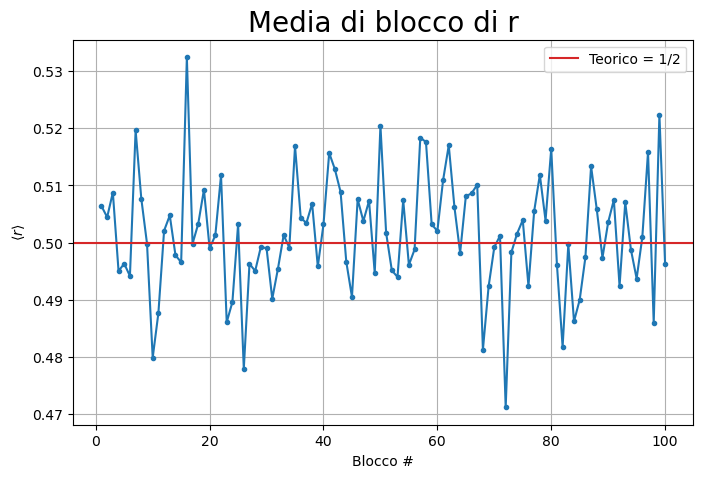

In [2]:
# Media di blocco di r
plt.figure(figsize=(8,5))

block, actual_mean = np.loadtxt('ex01_1/OUTPUT/mean.dat', skiprows=1, usecols=(0,1), unpack=True)

plt.plot(block, actual_mean, marker='.')
plt.axhline(y=1/2, color='tab:red', linestyle='-', label='Teorico = 1/2')
plt.xlabel('Blocco #', fontsize=10)
plt.ylabel(r'$\langle r \rangle$', fontsize=10)
plt.title('Media di blocco di r', fontsize=20)
plt.legend()
plt.grid(True)

plt.show()

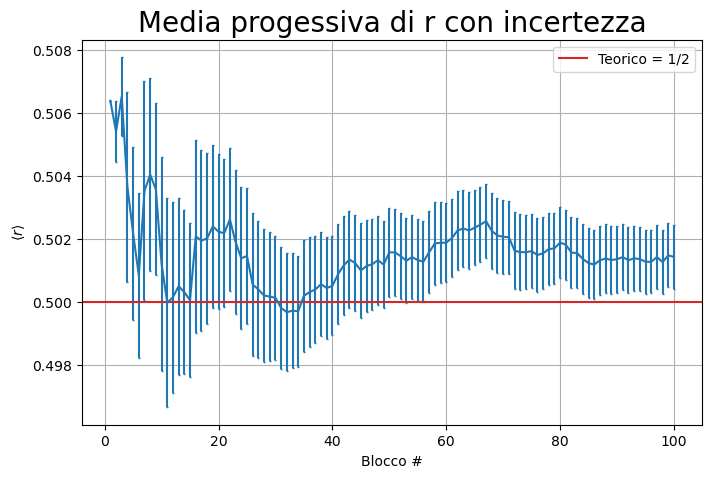

Valore medio finale di r =  0.501438
Incertezza =  0.00101189


In [3]:
# Media progressiva di r
plt.figure(figsize=(8,5))

block, mean_ave, mean_err = np.loadtxt('ex01_1/OUTPUT/mean.dat', skiprows=1, usecols=(0,2,3), unpack=True)

plt.errorbar(block, mean_ave, yerr=mean_err, capsize=1)
plt.axhline(y=1/2, color='tab:red', linestyle='-', label='Teorico = 1/2')
plt.xlabel('Blocco #', fontsize=10)
plt.ylabel(r'$\langle r \rangle$', fontsize=10)
plt.title('Media progessiva di r con incertezza', fontsize=20)
plt.legend()
plt.grid(True)

plt.show()

print('Valore medio finale di r = ', mean_ave[-1])
print('Incertezza = ', mean_err[-1])

Nel primo grafico sono riportati i valori medi calcolati per ciascun blocco e si osservano fluttuazioni attorno al valore teorico $1/2$, dovute alla natura casuale delle estrazioni.  

Nel secondo grafico è mostrata la media progressiva dei blocchi con l’errore statistico associato. In questo caso si vede chiaramente come il valore stimato di $r$ si stabilizzi progressivamente attorno a quello atteso, mentre l’incertezza diminuisce all’aumentare del numero di blocchi considerati.

### Varianza

Verifico la convergenza della varianza della quantità precedente, definita dall'integrale:

$$
\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12
$$
dove $r$ è un numero pseudo-casuale nell'intervallo $[0,1)$.

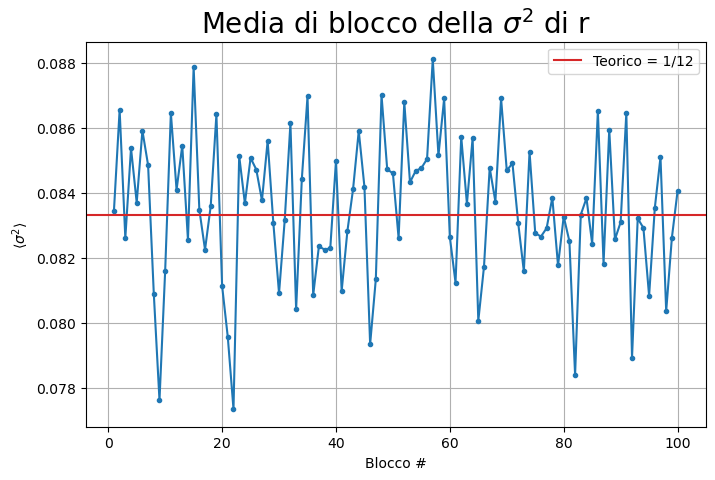

In [4]:
# Media di blocco della sigma
plt.figure(figsize=(8,5))

block, actual_var = np.loadtxt('ex01_1/OUTPUT/variance.dat', skiprows=1, usecols=(0,1), unpack=True)

plt.plot(block, actual_var, marker='.')
plt.axhline(y=1/12, color='tab:red', linestyle='-', label='Teorico = 1/12')
plt.xlabel('Blocco #', fontsize=10)
plt.ylabel(r'$\langle \sigma^2 \rangle$', fontsize = 10)
plt.title(r'Media di blocco della $\sigma^2$ di r', fontsize=20)
plt.legend()
plt.grid(True)

plt.show()

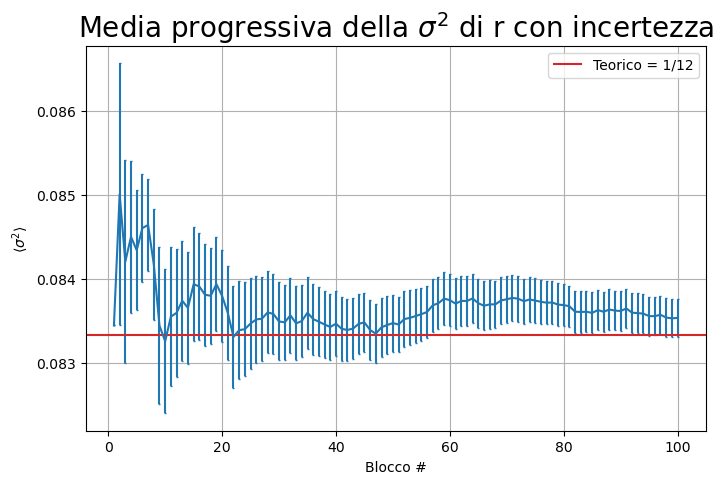

Valore medio finale della varianza =  0.0835406
Incertezza =  0.000222892


In [5]:
# Media progressiva della sigma
plt.figure(figsize=(8,5))

block, var_ave, var_err = np.loadtxt('ex01_1/OUTPUT/variance.dat', skiprows=1, usecols=(0,2,3), unpack=True)

plt.errorbar(block, var_ave, yerr=var_err, capsize=1)
plt.axhline(y=1/12, color='tab:red', linestyle='-', label='Teorico = 1/12')
plt.xlabel('Blocco #', fontsize=10)
plt.ylabel(r'$\langle \sigma^2 \rangle$', fontsize = 10)
plt.title(r'Media progressiva della $\sigma^2$ di r con incertezza', fontsize=20)
plt.legend()
plt.grid(True)

plt.show()

print('Valore medio finale della varianza = ', var_ave[-1])
print('Incertezza = ', var_err[-1])

Come visto per il caso precedente, anche per la varianza la rappresentazione tramite media progressiva mostra come il valore tenda a stabilizzarsi attorno a quello atteso, mentre le fluttuazioni iniziali si riducono progressivamente con l’aumentare del numero di blocchi.


### Test del $\chi^2$

Attraverso un test del $\chi^2$, verifico ora che i numeri casuali nell'intervallo $[0,1)$ utilizzati nei test precedenti siano stati effettivamente estratti in modo uniforme.

Ho suddiviso l'intervallo in $M = 100$ sottointervalli identici, per ciascucno dei quali ho generato $n = 10^4$ numeri pseudo–casuali e ho ripetuto l’operazione $100$ volte, calcolando di volta in volta il valore di $\chi^2$. 

La statistica del test è data da:
$$
\chi^2 = \sum_{i=1}^{M} \frac{(n_i - n/M)^2}{n/M},
$$

dove $n_i$ è il numero di eventi osservati nell’intervallo $i$–esimo e $n/M$ è il numero atteso secondo una distribuzione uniforme.  

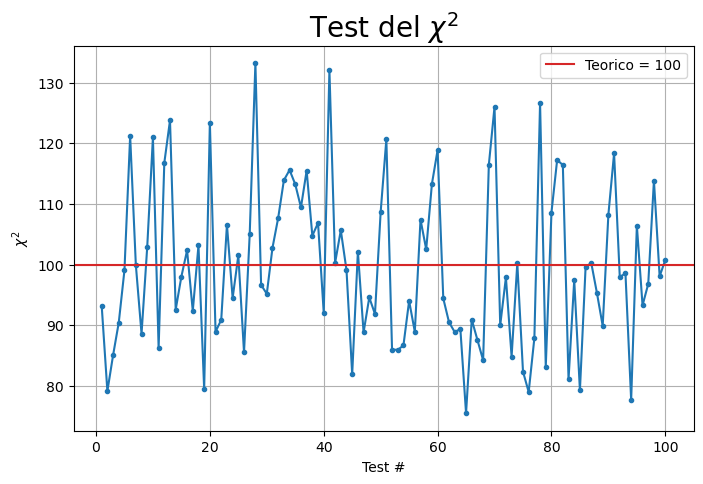

Valore medio del chi^2:  99.5756


In [6]:
# Test del chi quadro
plt.figure(figsize=(8,5))

test, chi = np.loadtxt('ex01_1/OUTPUT/chi.dat', skiprows=1, unpack=True)

plt.plot(test, chi, marker='.')
plt.axhline(y=100, color='tab:red', linestyle='-', label='Teorico = 100')
plt.xlabel('Test #', fontsize = 10)
plt.ylabel('$\chi^2$', fontsize = 10)
plt.title('Test del $\chi ^2$', fontsize =20)
plt.legend()
plt.grid(True)

plt.show()

print('Valore medio del chi^2: ', np.mean(chi))

In media ci si aspetta che $(n_i - n/M)^2 \simeq n/M$ e quindi che $\chi^2 \simeq 100$, che è compatibile con il mio risultato.

Questo conferma che il generatore produce numeri uniformemente distribuiti nell’intervallo $[0,1)$.

## <span id="ex01_2">  Esercizio 1.2 </span>[^](#toc)

In questo esercizio ho esteso il generatore di numeri pseudo-casuali implementando due nuove distribuzioni di probabilità e utilizzando il metodo dell’inversione della funzione di ripartizione cumulativa (CDF), con l’obiettivo di verificare il **Teorema del Limite Centrale**. 

Tale teorema afferma che, quando si considerano le medie di un insieme di variabili casuali indipendenti ed identicamente distribuite, la distribuzione delle medie tende ad assumere una forma gaussiana centrata sul valore atteso, indipendentemente dalla distribuzione di partenza, purché questa abbia varianza finita.


In particolare ho aggiunto le seguenti distribuzioni: 
- **Esponenziale**: $p(x) = \lambda \exp(-\lambda x)$, con $x\in [0;+\infty)$, con $\lambda=1$
- **Cauchy-Lorentz**: $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, con $x\in (-\infty;+\infty)$, con $\mu=0$ e $\Gamma=1$

Invertendo la CDF si ottengono rispettivamente:
- $x=-\frac{1}{\lambda} \ln(1-y)$
- $x=\mu+\Gamma \tan[\pi(y-1/2)]$ 

dove $y$ è estratto uniformemente in $[0,1)$.

Successivamente ho generato tre insiemi di istogrammi, ciascuno composto da $10^4$ realizzazioni della variabile $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ con $N=1, 2, 10, 100$, dove $x_i$ sono estratti secondo la relativa distribuzione.

In [7]:
# Numero ripetizioni
N = [1, 2, 10, 100]
label = ['$S_1$','$S_2$','$S_{10}$','$S_{100}$']

bins = 100

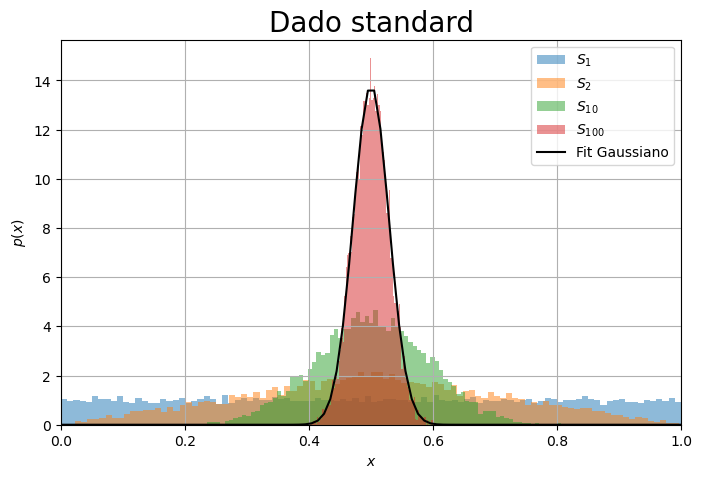

In [8]:
# Dado standard
plt.figure(figsize=(8,5))

unif = np.loadtxt('ex01_2/OUTPUT/uniform.dat', skiprows=1)

for i in range(4):
    plt.hist(unif[:, i], bins, density=True, alpha=0.5, label=label[i])

fit_1 = norm.fit(unif[:, 3])  
x = np.linspace(0, 1, bins)       
y = norm.pdf(x, *fit_1)
plt.plot(x, y, color='black', label='Fit Gaussiano')

plt.xlabel('$x$', fontsize=10)
plt.ylabel('$p(x)$', fontsize=10)
plt.title('Dado standard', fontsize=20)
plt.grid(True)
plt.xlim(0,1)
plt.legend()

plt.show()

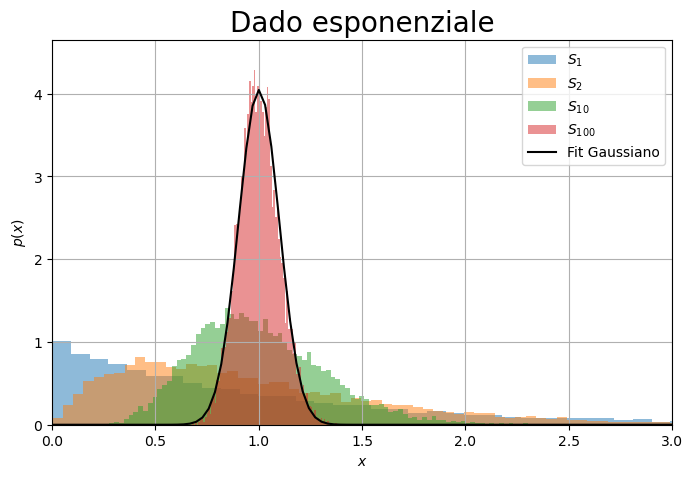

In [9]:
# Dado gaussiano
plt.figure(figsize=(8,5))

exp = np.loadtxt('ex01_2/OUTPUT/exponential.dat', skiprows=1)

for i in range(4):
    plt.hist(exp[:, i], bins, density=True, alpha=0.5, label=label[i])

fit_2 = norm.fit(exp[:, 3])  
x = np.linspace(0, 3, bins)       
y = norm.pdf(x, *fit_2)
plt.plot(x, y, color='black', label='Fit Gaussiano')

plt.xlabel('$x$', fontsize=10)
plt.ylabel('$p(x)$', fontsize=10)
plt.title('Dado esponenziale', fontsize=20)
plt.grid(True)
plt.xlim(0,3)
plt.legend()

plt.show()

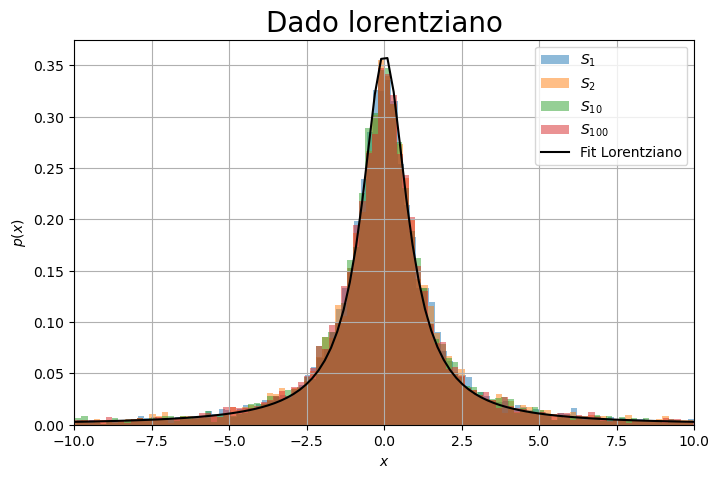

In [10]:
# Dado lorentziano
plt.figure(figsize=(8,5))

lorentz = np.loadtxt('ex01_2/OUTPUT/lorentzian.dat', skiprows=1)

L = 10
for i in range(4):
    lor = lorentz[:, i]
    lor = lor[np.abs(lor) < L]  
    plt.hist(lor, bins, density=True, alpha=0.5, label=label[i])

lor_fit = lorentz[:, 3][np.abs(lorentz[:, 3]) < L]
fit_3 = cauchy.fit(lor_fit)
x = np.linspace(-L, L, bins)
y = cauchy.pdf(x, *fit_3)
plt.plot(x, y, color='black', label='Fit Lorentziano')

plt.xlabel('$x$', fontsize=10)
plt.ylabel('$p(x)$', fontsize=10)
plt.title('Dado lorentziano', fontsize=20)
plt.grid(True)
plt.xlim(-L,L)
plt.legend()

plt.show()

Dai grafici si osserva che, per le estrazioni da un dado standrad e da uno esponenziale, all’aumentare di $N$ la distribuzione delle medie converge progressivamente a una Gaussiana, come previsto dal Teorema del Limite Centrale. 

Nel caso del dado lorentziano invece la forma rimane invariata, infatti anche per $N$ grandi la distribuzione continua a seguire una Lorentziana, poiché questa non possiede varianza finita e quindi il Teorema del Limite Centrale non è applicabile.


## <span id="ex01_3">  Esercizio 1.3 </span>[^](#toc)

In questo punto stimo il valore di $\pi$ tramite l'esperimento di Buffon.

Un ago di lunghezza $L$ è lanciato casualmente su un piano orizzontale diviso in righe parallele equidistanti $d > L$. La probabilità che l'ago intersechi una di qeuste righe è $P = 2L/\pi d$.
Se l'ago viene lanciato $N_{thr}$ volte e interseca una riga in $N_{hit}$ occasioni, è possibile ricavare $\pi$ come:

$$
\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}
$$
 
Ho impostato un numero totale di lanci $M = 10^5$ suddivisi in $N = 100$ blocchi, la distanza tra le linee è stata fissata a $d = 1.0$ e la lunghezza dell’ago a $L = 0.8$.

Come per l'Esercizio 1.1, anche in questo caso il valore di $\pi$ è stimato applicando il metodo della media a blocchi, in particolare per ciascun blocco genero $M/N$ lanci. 

Ho scelto casualmente la posizione del centro dell’ago rispetto alle linee e successivamente ho generato una direzione casuale dell’ago (attraverso un punto uniforme nel disco unitario), infine calcolo il coseno dell’angolo e verifico se l’ago interseca una delle linee.  

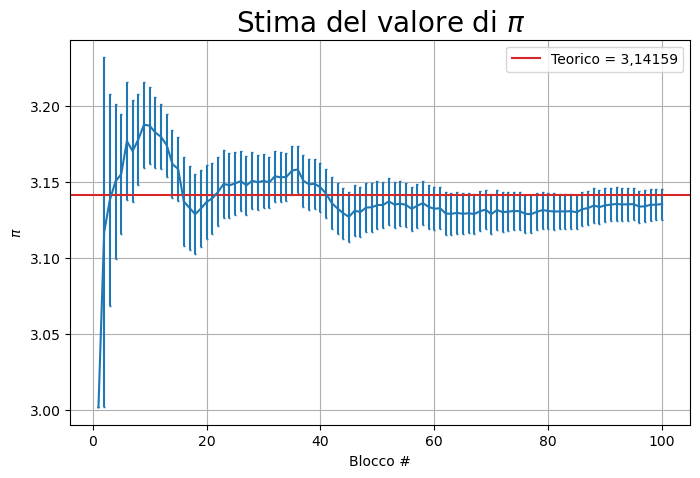

Valore medio finale di pi =  3.13565
Incertezza =  0.0102146


In [11]:
# Stima di pi
plt.figure(figsize=(8,5))

block, pi_ave, pi_err = np.loadtxt('ex01_3/OUTPUT/pi.dat', skiprows=1, usecols=(0,2,3), unpack=True)

plt.errorbar(block, pi_ave, yerr=pi_err, capsize=1)
plt.axhline(y=np.pi, color='tab:red', linestyle='-', label='Teorico = 3,14159')
plt.xlabel('Blocco #', fontsize=10)
plt.ylabel('$\pi$', fontsize = 10)
plt.title('Stima del valore di $\pi$', fontsize=20)
plt.legend()
plt.grid(True)

plt.show()

print('Valore medio finale di pi = ', pi_ave[-1])
print('Incertezza = ', pi_err[-1])

Dal grafico si osserva che il risultato ottenuto è compatibile con il valore teorico di $\pi$ entro l’incertezza statistica.